# Project
### Preprocessing



In [7]:
import skimage.io as io
import numpy as np
import scipy
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.filters import sobel_h, sobel, sobel_v, roberts, prewitt
from commonfunctions import *
from skimage import data
from scipy import ndimage
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from pip._internal import main as install
import mahotas
import mahotas.demos
from pylab import imshow, gray, show 
import skimage.measure as skm    
from scipy.ndimage import generic_filter
from scipy.stats import entropy
from scipy.ndimage.filters import uniform_filter


In [12]:
def calcranges(img,imageWidth,imageHeight,windowWidth=30,windowHeight=30):
    stdranges=np.ones((imageWidth,imageHeight))
    edgex = int(windowWidth/2)
    edgey = int(windowHeight/2)
    filtersize=windowWidth*windowHeight
    count=0
    for x in range(edgex,imageWidth-edgex):
        for y in range(edgey,imageHeight-edgey):
            colorArray=np.zeros(shape=(windowWidth,windowHeight))
            colorArray=img[x-edgex:x+windowWidth-edgex,y-edgey:y+windowHeight-edgey]
            sumelements = colorArray.sum()
            mean=sumelements/filtersize
            colorArray=colorArray-mean
            colorArray=colorArray**2
            sumelements = colorArray.sum()
            sumsquare=sumelements**2
            variance=(sumsquare/(filtersize-1))-(mean**2)
            if(variance<0):
                variance=-variance
            std=math.sqrt(variance)
            stdranges[x][y]=std
            count+=1
    return stdranges   
def feng(img,imageWidth,imageHeight,windowWidth=15,windowHeight=15,alpha1=.1,k1=.15,k2=.01,lamda=2):
    stdranges=np.ones((imageWidth,imageHeight))
    stdranges=calcranges(img,imageWidth,imageHeight)
    edgex = int(windowWidth/2)
    edgey = int(windowHeight/2)
    outImg=np.copy(img)
    cv2.imshow("Images",outImg) 
    cv2.waitKey(0) 
    cv2.destroyAllWindows() 
    filtersize=windowHeight*windowWidth
                
    for x in range(edgex,imageWidth-edgex):
        for y in range(edgey,imageHeight-edgey):
            
            colorArray=np.zeros(shape=(windowWidth,windowHeight))
            #if(x-edgex<0||x+edgex>imageWidth||y-edgey<0||y+edgey>imageHeight):
            colorArray=img[x-edgex:x+edgex,y-edgey:y+edgey]
            M=np.amin(colorArray)
            sumelements = colorArray.sum()
            mean=sumelements/filtersize
            colorArray=colorArray-mean
            colorArray=colorArray**2
            sumelements = colorArray.sum()
            sumsquare=sumelements**2
            variance=(sumsquare/(filtersize-1))-(mean**2)
            if(variance<0):
                variance=-variance
            std=math.sqrt(variance)         
            print(stdranges[x][y])
            alpha2=k1*((std/stdranges[x][y])**lamda)
            alpha3=k2*((std/stdranges[x][y])**lamda)

                
            T=(1-alpha1)*mean+alpha2*(std/stdranges[x][y])*(mean-M)+alpha3*M
            if(img[x][y]<T):
                outImg[x][y]=0
            else:
                outImg[x][y]=1
    return outImg

In [ ]:
img= cv2.imread("note1.png") 
cv2.imshow("Images",img) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 
countourImg=np.copy(img)
def signaltonoise(a, axis=None, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=0)
    return np.where(sd == 0, 0, m/sd)
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
showHist(gray_img)
snr = signaltonoise(gray_img)
if(snr<1):
    snr=1
if(snr>5):
    snr=5
sigma=(-50/4)*(snr-1)+60
print(sigma)
#We May Calc NSR first before smoothing to avoid edge blurring in good quality images
smoothedImage=cv2.bilateralFilter(gray_img,8,int(sigma),int(sigma))
cv2.imshow("Images",smoothedImage) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 
finalImg=feng(smoothedImage,smoothedImage.shape[0],smoothedImage.shape[1])
cv2.imshow("Images",finalImg*255) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

10.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


20388.214465198285
20297.09356080948
18737.77019505675
17547.361324202357
17780.199231873354
19174.080675992802
20370.288269185847
20330.305365238717
19874.620471950406
20055.212799804427
20328.074464899266
20625.65258144647
21082.25368465251
22528.588476042718
23781.656425629597
23016.442470836002
21240.000552612306
19770.051025192828
19524.036439126983
19549.496875730747
19617.41860938866
19633.95405400912
19630.864012413418
19600.112571331563
19512.419295600397
20429.0115380422
19580.322685127114
20574.647201489173
20768.79845226517
20756.115663332883
20791.630373814925
20794.275904306975
20843.10477902203
20666.640841206678
19389.25718439969
17786.904682008586
16615.697282738445
16999.84555084295
18568.54480613442
20002.258917607192
20596.88064785013
20299.781482899118
19720.341613437035
18135.0093999419
17033.479586606227
16184.953627708604
16207.124044018317
16293.656770582174
16349.553429991467
17416.961180209102
19107.241433544805
20729.65643349151
21678.362030852677
21729.2974

15893.425080235678
16332.406384617894
16833.818294478846
17849.798479358837
19196.337228904154
20531.587853184876
21666.38089587428
22453.38601359372
22967.23993543899
23541.691469754103
23966.033750591218
23438.590788810066
22643.17510955317
22152.658783497485
22595.18777855442
23801.754206501835
24090.1233631756
24068.574527630957
24018.129103858053
23997.23640876724
23940.528990277213
23787.323417849282
23716.915237220168
23574.827769800962
23490.90935610113
22878.16330692172
21759.296884291856
20795.389604080567
20390.64468519518
21611.91214310917
21423.027707152778
20941.445242850645
20389.169810807016
19392.937554080403
18021.17966335901
16558.55567642903
15255.67076941453
14315.542424553896
13701.124834805527
12911.922324055233
12124.853067657636
11470.229124106487
10740.10882920197
10006.478132075657
9066.907018363363
7341.475722778943
6796.222509540742
6697.862388891522
6577.967399721188
6419.183921613571
6309.150298626355
6204.334035800637
6091.558037490538
5900.754700820834


24058.46691362326
23948.213695870447
23776.551540971435
23593.74112414778
23125.177952523267
22532.100745337408
21973.455304452833
22013.56835129371
21265.432048025377
20469.421557503036
19607.475969096886
20220.22643707571
21518.463256669038
21548.885194646642
21584.475522345503
21458.902667459843
21339.520522333823
21251.36391577821
21160.915400993665
21031.21730926308
20369.87949895525
19271.53681682814
19458.29353133363
20654.722367607996
22064.255533756266
23123.622364333365
23287.54661108509
23039.808353910066
22389.740568507565
21718.77592203075
21030.57946200116
20630.874656404427
20100.37491897602
19717.45966307463
19172.462357104207
18849.456282098043
18250.29786935766
17802.258411162245
17834.377193292697
17793.250580869495
17206.633030729758
16812.507049285716
16217.633266285047
16665.258140582253
17509.59681975063
18979.30545948517
20639.475836475314
22054.926923471354
23150.361771232827
23913.062578962934
24396.701224640066
24958.371583401942
25361.799271052976
24905.2796

25611.184505656893
25373.682812196694
26135.892263644062
26668.112275843007
26085.364059266998
25017.557038287465
24470.527412876425
23485.46194994501
22796.70476397471
22416.250993880883
22947.80763422331
23629.638366035448
22781.405469175854
21177.075331328833
19869.117145428787
19698.36846963256
19739.339022514134
19802.91837448299
19861.327378748614
19896.857325263165
19925.812801010456
19881.86172334905
20797.937548660895
19676.88744134822
20625.67064396437
20783.331651329663
20796.904745256375
20852.470383360298
20891.70144539131
20949.497493421848
20781.029316758868
19447.901467531396
17876.185177250973
16769.28368784837
17224.49474747288
18747.213645202686
20111.677119847744
20660.750246384312
20352.92278631598
19774.532487087065
18175.35179942067
17075.261256273694
16230.275576657627
16228.442349707559
16261.366749009403
16266.517688938897
17387.916134722964
18986.53315385003
20501.976862310858
21367.86230728102
21379.280528713603
21400.740288404675
20391.322286106104
19027.06

25429.232621637813
23920.97130899942
22682.626444648486
22535.939833573888
22574.735854609702
22631.15582845501
22698.72008166793
22758.6066055065
22822.238447385294
22796.427723871744
23696.432043385317
22489.607455891426
23442.90821324265
23588.77280883324
23633.75509922577
23713.19850876519
23781.453044757523
23864.37996697805
23602.882251292733
21848.89669818794
19757.578684746593
17879.78773228047
17736.799842540026
18766.663627187223
19870.996087045172
20346.07924982502
20065.862701982962
19518.167499429735
18413.720506560872
17849.294896212046
17545.82906136549
18027.49548064187
18583.749076186057
19082.705503693887
20550.295256255948
22080.693505379993
23535.650547209327
24339.67974502188
24336.57738062036
24370.420957600123
23430.690182136063
22125.312223703582
21054.582666583345
23195.983891567495
23231.409741120762
23195.6556483251
23228.404133960936
23161.556618244766
23146.991704901382
23104.667651792653
23118.965460742686
23112.730181912528
23392.42710052813
23204.6980341

7904.082507673731
7924.0923132607995
8724.018452789853
9867.818736575298
10501.478420164653
10936.80230240622
11330.732316179145
11638.08332547399
11929.200098164192
12885.544868621098
13405.73441010079
14128.595528685126
14857.930705259736
15854.508741054464
16654.017900118753
17335.969436477048
17696.48339623621
17759.1419160652
17788.43072284095
16938.87143272254
16184.841369843534
15729.908189900569
15864.797988780258
16099.963020211793
16614.333231178465
17835.012398676736
18840.287114902658
19576.719142985716
20020.127089328067
20337.763179271322
20834.7081924521
21385.03256556463
20866.635277307552
20116.386206454277
19853.534364270043
19595.442376807496
19752.001955960328
20264.3941612283
20564.58323888287
19950.31799385567
19413.155456469813
18871.32011755549
18339.798883477935
17451.019769946655
16704.50763922807
17733.585762329945
17585.464830906312
17654.82321963058
17845.85032929105
18072.467658469377
18377.868497845622
18627.5901917772
18968.614354749156
19421.77996631363

24257.680500900977
24311.234610220792
24383.890852962035
24464.336131885593
24454.24876193519
25355.620894453783
23855.79350185131
24861.633295800486
25021.445823740512
25110.663898653198
25202.50623584493
25306.758414139545
25362.305741851353
25156.750688884847
23438.84653548087
21400.32378130868
19463.00958959348
19764.074291879657
21171.43358410209
22413.160828919146
22932.17884898255
22604.571311097803
22331.091560110966
21731.768852595542
21679.438284518597
21852.869057340777
22729.439697491678
23569.240390126768
24355.827377604226
25806.82649362655
27253.68376970709
28607.389485087067
29346.116335006573
29324.262254045294
29359.919815131125
28507.113665170295
27282.927529559805
26197.29831668533
28176.831093952882
28092.614502706238
27966.29635339742
27883.613008630542
27771.103876019635
27668.42874225953
27566.63368728594
27535.149836091994
27565.286549162265
27420.626264367245
26857.232794297935
26357.174461734532
25819.057944637978
25420.981552564397
25089.938432012008
24369.6

29985.046142130268
29965.65297633989
30620.14184831693
32011.314320867805
31510.290255703334
31185.38271176591
31010.895081746454
31016.602005258377
30971.93062561266
30939.00907840253
30930.492402789863
31794.750001579465
32660.72025692181
31811.65745728779
29957.809432869963
28446.959150908595
27723.651790541568
27236.734883615263
26671.11991680384
25184.445441133823
23889.438737612083
22698.79151664195
21669.62656369367
21109.985609697454
21213.460200786452
21683.91349277638
22193.000523709878
22675.363631736815
23207.815536561153
23803.566392598274
24399.70134430126
25325.549798444797
25181.724304517807
24374.36739623585
25700.625492646097
27031.542775670056
28968.01651548606
30289.39043370229
31104.725736252407
31818.824928474303
33125.96215663289
33601.00895716035
33048.07462218618
32220.172290313345
32137.00891209196
32122.34140381065
32061.343126946027
32036.057833226034
32011.648219403236
32020.519773684064
32277.195206271215
34060.707149684924
35584.597218911425
36563.2595108

15473.083885954993
13884.367367224611
12688.362854169889
11213.53497701577
10849.721034967455
10817.20560538538
10764.34101086428
10724.178005465104
10664.15599427202
10601.022457121348
10518.460622338365
10407.73165766413
10247.055172635082
10051.152876724485
9729.580460763056
9351.561522449523
8343.843505251296
2803.2945001731496
1742.0681766603293
1285.2855275754528
847.309422914359
553.091372526722
240.04831056017292
199.51659571082504
181.9126986738993
163.94700068353168
78.91300846160776
37.794151814246405
55.884616418257494
74.03954669198212
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
5666.238640910289
5795.732899027608
5911.8026198895395
5924.809914739195
5820.54954510983
6584.661659660219
7807.9036749798
7719.312898720504
7569.872128918779
8029.393981208438
8248.429505665341
8480.014226450756
8699.013320750899
8866.502789010769
9057.739334336089
9293.988721631047
9497.645571266428
9752.9621667528
10015.780800728164
10319.524442093816
10559.417892722531
1084

17605.626077308316
16125.335719258548
15176.834962501605
15061.472852969013
14947.276179781775
14878.81662719402
16036.17291586569
17506.24022877898
18498.877672176663
18688.06077765861
19239.17021001154
20061.97293913824
18181.38900039521
17821.894842782902
17858.767964990326
17857.973804915102
17856.65337641962
18005.987437951426
18749.16750924118
19252.352755635653
19563.9399280855
19397.42185465326
18046.944976097868
16755.09497042481
15613.387317773308
15445.199847875565
15459.183584209104
15445.34328529574
15468.019776201058
15938.746058445271
17233.965565458035
18464.743871497914
19176.36100334537
19429.02184792931
19713.29748730833
20333.800710531923
19497.95753932893
18436.904710071107
18043.521052893582
18662.359682615544
19326.302584444384
19898.00260300401
20924.868136691006
23265.572940847207
26509.212388521093
29403.7195805556
32124.68621650832
32554.772916455608
31908.15235182548
31493.467208252972
31236.80765104439
31162.395547291708
31116.6453861815
31145.25470686828
3

19668.21180065812
19569.411232587026
19618.45114789941
19380.612986840686
18925.512984885394
17699.658415179823
16087.52180268422
14470.54319748333
13251.073180085583
11756.813575686223
11382.32624532631
11346.513752439621
11290.857639301032
11251.21868422841
11192.00276203726
11130.005232376714
11046.911071386286
10938.35804221451
10780.237994527542
10587.816507970721
10270.037975440504
9893.061999876496
8685.076252758949
2541.5489731894572
1595.5059068233404
1125.1884529636081
668.4683958034323
352.8696879313016
179.51758528147067
127.56966911239849
100.42894684418374
71.02618242029219
49.3593807840814
50.748403708140984
81.82392929948236
41.33043631860517
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
5707.575112849452
5820.230063913014
5908.3905972020675
5904.659965789539
5744.188151463568
6788.758847632477
8123.017603703117
7991.205046470188
7795.198010324319
8374.442944647666
8714.081419848317
9066.900615325514
9399.714264852197
9680.926763478563
10008.9083404884

19183.294326013613
19075.055975268286
17712.0505725455
16158.505699667325
15150.1972016706
15078.001622893162
15001.866528111312
14953.234621446089
16213.051876976864
17792.959956422983
18863.455161470978
18909.236138925215
18930.418199206022
19082.021042671615
16328.59476271686
16024.28101387327
16068.262159555257
16098.806777253587
16164.832997686046
16287.407542857374
17021.71750667825
17516.311923271616
17789.714623677864
17555.975068277796
16067.740005348724
14625.83969526699
13361.766029411792
13173.481594453337
13120.70923100715
13049.147763917279
13019.090798161069
13492.32829773613
14884.461181534927
16208.127461374515
16807.5498809434
16776.496028535657
16782.22735241996
17059.324016813815
15621.27707444388
13841.102428790047
12595.116675015046
12614.258417773866
13196.521488897963
13926.573525300362
14773.77245488348
16574.68775405657
19463.705221638396
22229.024165232033
24629.117888859124
24993.5881292706
24283.779194165167
23828.720054992653
23567.609048153856
23497.24705

17906.446061877174
18980.129894033947
19539.154906076234
19608.149351858905
19535.944106700084
19450.5111969249
19468.768785002867
19312.16354637945
19138.515277025544
19142.33439270531
19294.33179920656
19479.578136672964
19411.554143455865
19353.87171601531
19291.580218935746
19240.660069438243
19160.13314688573
19069.138809811255
19004.20944975253
18920.802420168307
18752.456262275307
17852.587326035355
16440.44113459067
15235.522468680396
15236.764018682936
19297.004175152
19431.24079619203
19368.294289293644
18865.30571441688
17838.452488486415
16607.856965963136
15599.29238930823
15064.405314200641
14991.625330130515
15008.222568316214
15013.288336977186
14847.686613512235
13937.592371570317
12726.388833116482
11674.932787765798
11228.006496053733
10958.420961227694
10926.316002671181
10909.619164208518
10879.290839923247
10848.943114018975
10828.341945918137
10802.486493507253
10755.052227800323
10689.275725956792
10582.200733903415
10441.813817974029
10175.230115566379
9868.879

1.0
1.0
1.0
1.0
1.0
1.0
5787.4890134927155
5869.317056018343
5913.850452036046
5893.850184156622
5635.5930412801345
7159.930223693825
8216.950770347714
8054.293274283956
7846.585096282491
8496.42072666394
8919.084255583042
9340.943245752052
9775.437653286443
10151.104467754069
10601.351473633526
11078.504059132183
11507.313259012182
11916.380757909183
12310.410048038533
12735.14934283285
13166.837555771956
13659.612763599349
14230.189542147213
14817.8975085761
15490.00468708113
16163.967174868869
16862.05134537153
17497.785318096143
18169.341312250483
18837.721483240548
19471.306425374223
20114.96544806364
20718.288698959812
21273.727041662267
21444.975825175145
15816.036779026364
10546.691727349908
8131.874776527997
6791.368923203336
6842.280352448781
6577.7588577702245
6182.048342752768
6090.156852326971
5898.721233024377
5661.832989795088
5400.265966852283
5142.417551031182
4931.352498294615
4594.304528294161
4399.712666124975
4147.929995473234
3897.774281245107
3788.832137473586
36

13118.43916623206
11164.605173571565
9786.080568379872
9758.041572603877
9735.021708785529
9701.767696893523
9665.455994757882
10911.35684016667
13295.946422792465
15550.275546342911
17593.256443670325
17871.915612950394
17854.570268902957
17866.61690484205
17885.9181092916
17888.114276942943
17816.173934681683
17874.498724887333
17897.621865723446
17916.598207952244
19988.898785036807
22055.27590278537
22033.98910715179
21431.39905861588
19965.759771164514
18452.575840519075
17927.66984040885
18330.674610160102
19921.99366020105
20993.797311898947
22100.735422500242
22199.6652791737
22184.85160260482
22446.68736670894
22437.709955566977
22414.341638660157
22388.238282922317
21303.28490767564
19175.15948306884
17918.439777150037
17528.32624843472
18560.430609113784
19246.080513379922
19173.721407603793
19052.53567375287
18936.99901844746
18787.04975144118
18589.84985899611
18453.195651378595
18258.96812208292
16657.342317946062
14759.483179895438
14811.49453192533
15879.139490519005
16

3724.273812374998
3437.823832008628
3211.984958384465
3022.6313946336795
2902.411173596911
2812.713547387144
2749.3203425594343
2736.4223616036575
3258.992139695509
3855.1467851989423
4354.076047358594
4851.813424916921
5309.739754516528
5820.456615849634
6431.093681118376
7419.866604664779
8401.519692391399
9429.80534937552
10473.425813695503
11418.568981326878
11584.317772955625
11702.88512966768
11831.517106801124
11952.991536303376
12070.72751309149
12092.57943707628
12189.121257396446
12298.310510534704
12413.145788353735
12724.867251652553
13333.951301982195
13848.866335863877
14385.130981620032
14946.046611181786
15596.61144734337
16255.654442264358
17155.130789187064
18063.824248636534
18209.36730305008
18092.491249553168
17994.209627924167
17596.068420281063
17210.787485885918
16753.095340380594
16166.427596265701
15174.403724489002
14145.488196215088
13116.92815055286
12068.558361589
11081.105556122284
12221.424791652782
14891.565820643276
14949.893648815221
15004.62217730700

17267.789298634638
17549.30970948024
17466.41204235848
17352.692519252778
17240.385660939613
17120.055940375085
16983.36406308
16857.17166297861
16707.480628199588
14699.433666151617
12942.714447544064
12848.24571147939
12770.63827781988
12676.770145864619
12597.145044468138
12530.511126455673
12001.577345989412
10290.735198547749
8762.443868375056
7539.287485261317
7386.750092337665
7321.8362657593825
6932.739367011331
6846.931983410176
6804.932633126626
6768.017297466873
6740.312084005194
6700.956739343401
6406.455698734367
5552.11264504948
4959.794756292368
5423.346796121081
6046.526895657958
7132.9978854143465
8371.138537217552
9344.951906596538
9892.501082872624
10107.161634934448
10252.334173252668
10336.645375878083
10345.962701661194
10595.573098698047
11719.198929989288
13168.167627091743
14368.665729773911
14836.27534533823
14798.85792105741
14753.75055797534
14699.112100906948
14626.903742924344
14566.87983548889
14479.86418262988
14401.05191716508
14329.311423236197
14266.3

7412.743425295592
7359.469140036389
7299.56167880213
6905.994461371245
6820.1743592126295
6780.043725112219
6745.271384961974
6720.059352719479
6681.693858954612
6424.9107254269875
5563.779870113181
4966.186195933805
5466.201511010824
6106.582720459051
6753.724923789039
7500.592851500941
8591.224625265451
9499.101183249677
10193.522347732065
10864.180634348157
11601.118548585247
12366.066425754443
13419.806694595167
15036.27600787217
16405.828216464903
16966.964377433746
16906.833283239896
16830.972271854742
16763.31694672529
16686.273828162943
16591.36578480557
16510.029063405887
16406.314244687583
16311.864871285714
16217.952082180038
16132.957259000885
16063.06857048625
16001.381195274951
16000.092211710467
15545.44074909794
16680.76120282146
18833.095113954365
18146.2818759221
17609.367753513154
17071.53669283701
16417.866336447638
15487.02323603451
14688.929858301783
14075.69559937715
13497.01653685962
12845.20189712708
12144.817607350564
11181.241520914698
9667.399816943964
8342.

12640.238305451407
12520.203471721228
12405.59895641119
9993.323980706919
8387.628419493823
8323.66310744351
8281.959840133019
8210.81175131538
8138.788979727631
8071.471350005483
7970.079496646189
7881.284964506169
7777.288444606869
7362.455981429893
6787.645194208857
6324.997737083135
5777.786722329271
5576.22096570728
5459.03535805883
5355.678780919631
5271.85454242052
5181.882379898456
4903.024071513903
4257.273262419779
4108.006521891383
4845.36117291881
5469.306424868911
6090.735978841872
6829.484276149665
7960.93108495291
8864.046657016555
9561.750491168816
10218.914630279538
10953.699320299545
11721.358174028712
12543.800461846586
13243.232613497255
14000.887274654722
14786.624219354106
14747.048126044034
14689.045589970112
14630.751994713422
14565.641462445541
14496.068907829054
14443.567311546145
14378.305940114353
14322.230609753213
14272.241704490467
14232.762349243189
14206.118817834797
14186.157447469965
14232.233144885158
13801.743739145779
15266.187631914247
17086.33546

21181.693287215407
21192.67563792315
23924.632855946587
25158.93935406025
25152.318925114556
25121.051198723762
25071.533288871004
23674.108652841856
22616.69970294883
21712.79903367763
20851.556480101957
19961.890585198074
19796.450600615437
19734.391983434012
19481.039770944717
18893.456845121884
18404.42529645873
18056.68518088253
17683.772680148126
17181.30270598319
16475.1202698733
15671.441949122938
15849.536996555922
15837.846169610235
15806.210584881797
15792.417790024603
15743.748425885733
15670.174402780718
15579.478868325752
15485.929001792614
15383.267675036814
15277.80871989567
12826.299462536974
11508.27042205965
11448.567491335598
11432.835899766309
11390.977417937314
11341.664068117105
11294.705264580729
11211.17356159625
11139.670091186772
11045.903236800767
10324.558227849478
9449.770569484363
8486.21639364663
7514.055041383368
6556.724476212648
5661.6901242574295
4857.506848738503
4189.193894958866
3714.435479576706
3909.16693524402
4326.1135879120775
5005.6538177949

7525.9041929999885
7566.230639506645
7567.936077000711
7601.138455958008
7629.212183195053
7677.781823252048
7740.548738886644
7815.359927710222
7888.825813345406
7976.701085742295
8062.957830001915
8152.603101406609
8242.572516830951
8348.24126434664
8445.240179129942
8555.370471863565
8680.90406879015
8829.970868294717
8989.295628293581
9188.084300525845
9381.372099659027
9618.409743628581
9884.582647889487
10324.717491463156
11318.516052403751
12249.393634212569
12480.148034947997
12655.770740746115
9395.788946613531
6186.85483389207
6198.35415245035
6120.540945732311
6079.922458690635
6033.928701098905
5987.248469964755
5949.471466399225
5856.427873426831
5771.295723291144
5725.892935724634
5668.140497633287
5619.214114445122
5598.927238350414
5567.76101858341
5514.267557361626
5479.591079055719
5450.278045386028
5422.207589815511
5389.913402594692
5382.50896781991
5371.7751622362075
5355.005190844297
5362.822653660193
5378.563263877935
5103.5649466476725
4172.561999569688
3292.279

24499.061869867186
24483.333853957196
24479.974116553647
24460.324845515705
24443.78288119652
24438.13696212126
24443.38043703613
27143.945825422492
27928.15669202043
27878.16301796558
27800.88733267298
27718.903877365185
26129.124017320075
25070.959373690654
24153.770840304966
23303.318921061957
22453.62947896954
22338.31368319097
22221.213095761144
21928.76086892748
21313.33644603226
20895.646866117564
21019.464838442113
21041.09968275375
20942.71501936167
20440.210116616312
19445.937547320875
20292.52109730571
20407.731809245233
20317.621201805476
20274.948350208586
20212.26112673842
20107.159474923792
19991.577825414242
19878.527691984873
19751.1796235981
19616.05066964551
17105.85058380903
16538.258500128602
16839.03628652724
16887.735686974767
16799.57536787814
16699.12545024733
16613.761603135743
16527.63696930733
16412.900455624236
16264.232831771495
15472.220469966995
14621.586280324616
13667.120349535531
12732.064417195195
11711.121278692353
10264.00651784307
8851.89666058607

13312.861107522758
13535.763426045909
13700.854674755194
9845.142488482697
7264.633834515698
7271.6100443580945
7217.4292415913915
7191.295433160192
7151.004920952213
7115.146842523776
7093.718476390626
7010.4077108020065
6957.3231941773
6920.6784861644865
6901.651404711114
6874.01063789718
6911.49238422986
6938.6162259447165
6933.7706161364495
6959.3921860186965
6989.17389474768
7018.866070235742
7040.118055802606
7080.8681876744995
7089.675619578487
7101.395471063286
7123.406993648521
7122.532113553267
6866.225926937391
5976.425066475303
5126.113912010679
5151.557594290553
8460.00160866804
10118.446674304212
10188.688193642975
10239.196379278459
10253.68218807295
10280.53059368248
10284.420764528719
10284.785140008793
10253.959216107472
10236.962538890248
10230.229208661189
10198.237136194377
10152.693843527692
10138.435545265804
10100.366501474486
10067.29115970275
10039.26361961522
9999.197822616936
9954.852894213089
9902.688489130713
9863.613021401456
9816.132496650656
9783.266647

21784.548673205038
21754.891573210305
21650.368524206948
21937.414863069633
22531.665508149992
24393.880182497043
25773.34508643037
24562.93021829158
22508.917356084734
21220.383267768568
21256.21284110452
21212.349506276554
21214.946261366353
21242.80479549409
21245.891688436528
21210.177239398967
22004.34205721807
23698.86962304555
22269.647979704
20437.67139236747
18925.71661652264
18655.592308578372
18568.65666402519
18507.704232383465
18502.349881073733
18824.644423007707
19759.079254288226
21035.931081209634
22360.218775830886
21955.877714304097
21428.03610561332
20834.44590960991
20181.807000146553
19551.891013395663
18924.455532487285
17026.520456086386
15473.257895389232
14750.932096694316
14770.059845357437
14774.232865442054
14940.475465283567
15208.550339100273
15865.448031706224
17385.425557803406
18189.85545135761
18890.279283284835
18085.165833025676
15807.14264483653
15820.387655432809
15863.104767025641
15911.290382161696
16455.15724015393
17018.93722300334
17374.74781

8520.534634249447
9805.92033602913
9826.613404629785
9862.316807217625
9844.238075051446
9854.956379600055
9868.141263797606
9900.42076611198
9953.832833386943
10021.924114051726
10095.902835780167
10164.7682198094
10232.459196406655
10301.227681910625
10364.865094666524
10446.224477444033
10514.337041044575
10585.567310388198
10685.520277193824
10837.019467241604
10994.505058533008
11189.729276630354
11382.315299672904
11613.612160283983
11870.292772158029
12307.616182408514
13279.57009235505
14179.706482543153
14405.14731255975
14577.218283520431
10174.57327290919
8064.323147991028
8091.235091474668
8062.8942065835245
8051.932295267461
8033.450748270458
8023.490631242259
8012.4017111248795
7945.44973067271
7899.818926376941
7864.05634667039
7851.267480523771
7830.332964207018
7879.433502088578
7910.365455787565
7917.244980108923
7945.716404223065
8001.794981361716
8048.662778902641
8070.217272475372
8114.293817047514
8128.060563313703
8160.731080193971
8190.982816700742
8210.31270402

24146.258050977944
24736.03003862095
25810.752652066752
27569.80477451921
29736.99484216062
32112.65580649089
33793.80384398171
33449.14259392999
32997.107166802285
32739.342226117536
32538.035138239084
32428.141636699933
32429.583143245676
32427.205802036726
32423.083015029733
32435.67866413379
32466.143886597085
35179.31225306331
35102.02761883735
33528.02561551684
31994.651759020922
30900.24362544257
29134.010382152206
28231.275937469523
27868.72005626297
27839.707192348593
27563.792238275822
27502.96476164581
27415.421514439196
27163.116081973607
26611.086672530062
26230.086567296716
26429.986109182686
26024.97485177611
25346.18570878268
24347.339161232856
23634.669803385434
24523.91205053256
24613.265691788885
24502.37589446035
24442.77570566636
24368.6775779414
24257.124206521647
24141.689892146125
24034.80763209329
23910.980307019676
23757.92120315529
21589.873266053215
23146.45608918989
24628.867279805374
24770.513222673686
24637.204004440555
24500.52220727925
24363.26637626127

8873.815488178816
8812.563454354893
8739.761272060254
8702.578236109572
8697.851201699083
8688.827335707398
8757.987589191342
8791.472895423582
8809.334683068253
8838.089669181403
8905.462859427207
8962.81449689792
8989.721944121256
9033.860070884104
9054.377800618446
9088.083778917788
9124.529592563147
9166.600351847559
8946.062227566033
8120.651954249136
7331.8109749853975
7448.066390907533
11395.460652265881
12229.960010060693
12264.561494992911
12307.414585303271
12350.171299187656
12396.501476507605
12413.562724593743
12405.998800710926
12375.628442073985
12354.980361313743
12351.564761195346
12326.35435291206
12287.65023827523
12276.652257189642
12225.246413969136
12191.579097772154
12149.264543719273
12135.582474961391
12095.254208831344
12044.355484414633
12029.791083326701
12004.578686567844
11997.711583429547
11971.068529668319
11955.256720734262
11917.975129244152
11873.223295228438
11820.469629629715
11787.93868304369
11640.669848575542
7850.383020606576
6932.495460946724
6

8379.18943152136
8386.374119535592
8365.17493497948
8341.847133183444
8313.614683385107
8303.90874451772
8276.221281264212
8280.388015816176
8302.581884832818
8313.499923308209
8329.64619983466
8336.736895240581
8378.07883953494
8359.403648642718
8302.31642671671
8293.410412187237
7737.786100678677
7029.636500745541
6687.7115237212965
6662.247014245625
6659.536646636913
6655.550205170468
6656.95500232592
6679.927695984177
7969.2734239205065
9890.916969482263
9897.243288714011
9924.957483416478
9913.539417925684
9885.65712153004
9860.017602919428
9845.286589509034
9957.747317795123
10242.989943092147
10614.503159910668
11034.052865596279
11472.318962154643
11981.508158773722
12195.932351660435
12233.153415656894
12210.94731746543
12207.197104980061
12170.696479522065
12155.899410102775
12158.707128660597
12137.025958102493
12117.851917717726
12090.671463135017
12035.46214763681
12011.431599726691
12025.603746044988
12042.632860585036
12588.567118819823
14393.458114620373
15376.752066217

26595.105546934774
25871.29621441697
25986.775553033614
26444.979243049213
26700.213332711715
28238.79844437902
29785.80874835884
30672.573121266025
30492.935725967523
30303.69383916933
30125.756536314155
29951.221235754765
29813.99048659768
29728.857506419132
28812.532512888563
27807.008540653907
28263.441418894792
29930.309785649173
31606.047757517303
32159.832534784913
32620.56586178648
32967.54405468907
33255.8930095405
33167.08148460376
32842.12929552855
33224.785842133286
34024.46030195817
33743.80587029488
33519.431759101935
32908.599986703295
32036.288582953763
31543.76536487314
31574.89670493367
32602.06720699191
33520.09458967882
32549.478257289073
30908.016094482187
29914.15636076842
30010.184916949598
30055.75890441982
30124.380832179526
30235.495813401463
30311.74385512808
30446.16630491401
31968.52120751538
32203.932499211372
30517.43823151421
28448.74616187245
26592.28165920292
25835.822513311858
25227.495975893853
24657.32472599063
24102.826692987157
23842.59021234107
2

30392.46386796292
28890.72716289598
27210.308445413422
26744.240072671804
27364.896649738464
28051.016698645584
28142.26277866477
28181.442044309126
28224.948001263616
28261.45344187822
28300.47596131153
28537.92778536225
28948.119559753653
28451.946135355545
26769.20904175239
25959.076453103244
25613.170655504477
24900.52062260454
23883.90038828743
22645.60263914574
21749.558987462384
21003.104126805534
20322.70238752117
19013.263182595267
17545.795113181066
16030.213939100391
17155.675415290247
19327.271764415862
21429.677462242755
22479.955354366914
23049.44254398426
23557.786685792165
24049.59039825475
24600.105844750833
24457.59507023896
25249.80231459784
27594.61832763296
29225.963981770772
29687.001770193994
30100.564304871914
30451.475551128275
30772.867947267536
30429.95971301818
29643.206690698138
29709.47116837476
30091.205031747457
30256.566741198567
31632.678464540622
33053.033519182994
33855.19844030757
33651.13165146555
33441.38995053311
33255.710739262904
33064.78070226

9566.148163478045
9218.151107319687
8957.516781510529
8569.13824075842
8167.667302434068
7751.68958711029
7544.632117301775
7376.645424714164
7207.0134724454
7158.195225194067
7030.930976071574
6567.338689214522
6483.614604651421
6307.637543703987
6249.364457893817
6071.679580372592
6027.31596066483
5714.48587198576
5639.24407685316
5415.016848086985
5441.792334484085
5260.645399406393
5027.445305179842
4937.593857797604
4996.729313855318
5601.755618760036
6106.923049838214
6154.377086864908
6223.889038542964
6289.403131149548
6378.835722293639
6458.5700318423305
6531.816763491595
6572.051172960285
6671.331835945149
6773.8118646098965
6869.057874001328
6957.643037209059
7048.228052370678
7118.072933323518
7185.282658197187
7248.759612120169
7332.137108003479
7404.167881389168
7464.7894558577145
7524.322463040698
7573.246274937234
7605.21871859149
7644.193548329394
7648.9598325066945
7640.508624609856
7643.905809181827
7665.888891943713
7636.858970060264
7336.831433782956
6589.364190397

33492.97376188964
33618.811278081856
33549.58178778532
34311.22822579889
35480.65900393388
35574.94482270082
35711.81166550917
35445.40513162788
34964.08653895676
34979.33752657706
35020.760964440386
35965.32412041579
36809.73695381805
35826.203306074945
34209.74336771109
33211.6430832165
33272.1194459775
33317.30294989686
33383.30588142923
33482.228982660905
33553.93192471442
33675.015197726105
35173.474474349576
35302.92189799943
33736.18011737602
31798.31605638933
30034.605484401418
29252.31853289882
28622.99912450138
27983.284291945714
27169.500070222784
26589.00024285463
25684.225720009603
24658.86526560769
23996.094337848135
23300.960416974292
22646.637327847908
22080.59369958196
21556.815429481027
20834.65352023165
20154.856685903367
18404.954638766347
16976.589336089786
16290.309671000257
16260.082634375345
16699.034411030774
18334.16386775677
19554.87665328462
20628.02257389203
21803.20891994501
22403.33058653913
22870.831040419154
21013.528345029652
20191.44892364981
20096.85

18826.65444233362
19913.573616154048
19989.026632921436
20064.03522248545
19670.587944588584
18413.199559751276
17351.662997196116
16466.009182537127
16383.797800556978
16924.225587162095
17308.52606200599
19018.77666032317
21509.104976538398
24109.226227048894
26477.031340865364
28036.657238336138
27780.303959755307
27467.41758594824
27343.111143174065
27230.971026374926
27213.605137781786
27248.67256687136
27269.554295441147
27305.732422584315
27335.614183950667
27507.39502255281
30059.00113647869
30001.607382654205
28573.945761186966
27168.938499440836
26204.337762015042
25161.110777386377
25731.830833000586
26813.898514789264
28129.60550756665
28808.18278392542
29230.151003583567
29620.173916095773
30053.31048585156
29879.821755128192
29728.442237136893
29320.054654671403
28199.66696600341
27706.293240595896
28230.006678713646
28997.246156527963
30140.178293082474
30244.494217647516
30181.076017497053
30189.46593793254
30150.02288903318
30085.56810402191
30006.079066123606
29935.61

6728.934563091227
6876.314118092611
6893.236744085995
6958.625595010963
7023.324751514174
7273.780018589106
7315.594441970906
7343.653603144279
7355.706350408236
7435.33061755001
7435.333483234657
7437.724010622594
7460.801250384851
7487.0682906520515
7438.127976466237
7412.592617810793
7592.282291056988
7641.078886932294
7649.7753147142275
7614.142840501825
7787.514262223397
7201.438492280112
6453.907832535469
6291.381585722673
6279.802635990163
6291.359985809124
6260.043971033347
6440.630271879583
6483.624057756577
7723.4131662532845
8622.951172628262
8615.686690569517
8665.035445857948
8655.704239186125
8625.454988348194
8472.485863950435
8472.1028863209
8602.028624393259
8922.45549289615
9248.514983029625
9747.091546312844
10202.421417292682
10740.50654461323
10994.97866867922
11048.66356995264
11028.420114845116
10875.624759761462
10854.168912377587
10854.645063179667
10870.696162302196
10715.110721764666
10721.30493680218
10725.44629885835
10533.452960598815
10542.280101182594
10

10220.947788106678
10179.088650038173
10183.893334674518
10184.308063070253
10722.551564221809
12699.288949402699
13728.853819469161
13684.93636990206
13679.343524230631
13653.52062233758
13618.492167713617
13571.369491132298
13389.379969970345
13392.97932678005
13265.102332389371
13353.918627228364
14457.633666036521
16391.853669542823
18482.40567591382
19123.58056314585
19433.115361674114
20384.1953018593
21717.184080255443
23250.793850859525
24419.736186178863
25360.14720436623
26299.460784733485
27791.055468614923
29341.750773975382
30950.167477486433
31437.00372855411
31533.903174711133
31624.636370045257
31685.049642260325
31211.556128282762
29518.69309670176
27697.11102696789
27107.525758568732
27779.483546390522
28240.37601932627
28320.496830228603
28419.134334975006
28497.310504252826
28651.080432526574
28730.38841744142
29043.68463110271
29416.666738918015
28764.81466247598
27004.891357378965
26046.84553518914
25623.407846800732
24716.84021925542
23467.971667494192
21942.9874

178.65496552526045
177.16066912860668
176.55697652158895
176.2842263106021
175.81997738842526
173.7753711831329
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
6646.666862941734
6815.969979682807
6957.247272807528
7002.717272762586
7107.661743954867
7914.9271094805235
8035.296437105676
8246.474128654294
8253.498057167999
8293.81991899824
8415.584633469327
8428.597695468225
8473.815393131907
8532.10128320668
8590.847982350611
8663.262633984357
8762.227824782414
8923.810382677531
9097.139406599863
9258.849012773802
9488.374802441014
9724.035745018444
9976.38712348268
10258.03840555595
10509.969039952366
10775.91053404284
11138.70751316134
11411.569841346221
11677.5270327835
11937.808894461728
12198.829557925326
12420.983271644312
12649.033458256243
12808.94400108607
11938.366222499833
9658.302676495407
8871.503923543865
7624.270996148745
7359.143424737263
6987.649895795774
6611.533340774432
6393.498108005667
6167.458109386974
5961.514175655996
5882.521811841375
5714.17032

6002.9747176218825
6015.092452288561
5987.952983698874
6190.776873649419
6179.7872651648795
5879.1944657425265
5577.021724321998
5337.484750129589
5129.343755915411
4965.927988785482
5113.10798668547
5116.503406609573
6035.242808218674
6492.077000350305
6450.296229608704
6465.952338878512
6441.9472177696025
6397.777318005339
6292.352790190266
6276.595274615653
6250.020399099476
6224.685765127666
6132.468980496149
6236.3960105422375
6230.221623850433
6205.701634476614
6231.296472610856
6259.539742028264
6239.664701069788
6029.334094756583
6009.7476019210935
6116.647306889668
6130.213993063414
5928.483853027767
5924.718166152965
5955.273435495365
5778.804476325362
5744.211182554783
5724.501677733888
5694.402360551831
5626.332617347791
5694.700584341713
4781.989338940989
4247.351571856924
4286.945985884343
4290.039735970983
4289.131033462483
4279.361558100575
4104.700071398133
4138.2644701908075
4175.76648786436
4612.358892354925
5613.852834631578
6410.230232916333
7260.307468861282
7970.

11143.220151772137
11013.519369894339
10885.23033061563
10762.21154084416
10469.555640501065
10335.242402659424
9455.760555122788
8008.552828212978
6902.12496794251
6351.808632205501
6255.823173729236
6141.247101239907
6021.926497487518
5712.266814233226
5609.855983549721
5494.568294007741
5342.076938258233
5146.853892727714
5038.302532371535
4935.34159160499
4835.931527706481
4445.833551693065
4254.0622578474295
4049.31982277695
3632.0806104693584
1088.701920730906
753.0187974405939
571.7349669369485
408.745308667493
73.76055954644818
176.8499411806869
179.84192806825828
178.55226313697563
178.05970463876022
177.04603124003992
176.90888998032204
177.2365417270629
177.2354429820462
176.48672381220314
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
6879.568019245158
7054.152766119066
7196.010084939741
7240.488160963898
7296.690819845044
7666.164143302252
7692.171496525605
7760.720925119485
7704.180941723275
7662.091971147709
7694.71683256461
7620.085968920478
7547.959551

15456.766192637933
15454.258926207165
15494.375594857189
15535.503948615069
15446.684356595726
14955.26846971369
15005.187962180054
15085.277753307184
15148.057107664583
15110.037181015352
15073.67699385467
15904.83516846253
17085.83430452125
18255.104613209503
18770.15487223261
18968.73282219948
18904.721709662983
18231.916780981872
17303.904580660066
16378.486735754257
15462.53225311396
14586.788570775896
13989.000096784635
13186.29877055519
12370.375465811596
11505.922570659553
10541.587379645396
9758.188283312371
9083.056472461974
9315.494719465503
10191.517087819644
10980.910857318531
11918.138341693742
12868.711525210787
13793.97728490963
14965.818715862883
15994.057826003907
16987.885067296425
18010.20604200966
18856.565522603796
19534.117442264233
19539.993427081292
18535.949754322177
17499.614257049772
17137.659466327124
17005.789981662998
17034.824515208507
17043.87937829725
16984.918466294705
17299.363843967643
17276.31939901107
17280.821982513462
17195.23027427395
17204.995

15229.548485331281
15293.71500207726
15022.821541264018
13923.011317710161
13994.386121537606
14082.467119672423
14157.960282402428
14130.610065924233
14108.429870427804
15042.840450698344
16247.063100049741
17434.763231083012
17978.371645479805
18186.876267149117
18128.503133973496
17448.715180617735
16518.164371959116
15591.051809089502
14669.723833315296
13790.291043128173
13200.281372260828
12397.561715421722
11413.634778794007
10455.91890876411
9494.774185489037
8709.978414519785
7934.681754149592
8296.621233089485
9311.255104507205
10130.544301712376
11091.707840628616
12066.693930812735
13023.994214085391
14230.198915575898
15503.67677159914
17415.344438803193
19180.248920674836
20643.068266058945
21918.13484794726
22209.803766872737
21234.638481787762
20221.4859339609
19874.619896012624
19761.419140988724
19806.883637700223
19819.70032480085
19839.737238319143
20656.448305768576
20636.693110010056
20641.17082934613
20536.14971060033
20500.843936110326
20474.39123728321
20483.74

4243.3453427091945
4211.488837042936
4163.809600494221
4062.0646611142915
4308.131575135347
4275.247590616069
4289.505866179126
4870.524975568218
5313.00047692046
5457.057181674334
5472.44339739264
5468.619301859034
5513.16642584842
5442.191817826304
5181.639947050153
4921.578348779257
4826.614193236651
4524.5840612813245
4425.80409389105
4331.320588118941
4233.525920576508
4139.8879336735645
3906.160727233069
3825.7013830364654
3743.5334164806486
3652.2600538066404
3338.7806075780854
3257.2481058221333
3163.422357289442
3022.0575942298688
2839.529564226978
2751.38384732086
2667.252175750682
2583.9937722222708
2248.0505478611904
2145.1705253635473
2033.2902199871678
1347.210385123406
720.7807781443556
478.1562637277553
360.31363294366236
258.7194942543145
169.31259399365337
184.1614262925243
182.22832019652236
180.49325148776643
179.58077191221867
178.02762718293982
177.52155825980049
177.56764782985516
177.1866988706475
176.26900496957774
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

23369.516667937893
23345.201851613972
23347.06596249235
23375.239148620316
23332.642228668054
23286.107325089626
22740.582966103833
22249.84575901182
22513.19237376019
22495.087156311234
22616.48870182972
22594.631318404976
22216.192432730535
21778.721671513606
20704.739520419105
19885.91737701162
18498.42786460779
17113.363589324854
15699.229079855968
15562.978833143827
15429.670922182695
15270.832159137106
15261.89620962183
15313.547211468467
15410.31628383107
15616.295774387665
16458.290099463367
18796.723903330516
20144.883641326065
20074.793377230053
20057.33367699755
20133.73648547001
20171.379241143168
20349.70062345119
20604.8850590677
20866.96286386404
21152.159774593732
20801.774328196898
21408.693529735112
21947.620074594513
21915.707507774536
21076.561620199045
20351.91816075663
19770.044051618468
19085.938949655032
18333.350606786673
18773.524093544787
19438.26342862172
20092.94831307519
20132.134898704222
20172.366713495576
20305.11555270946
20221.262772427333
20128.16403

8116.629063048981
8222.951455183987
8914.918805493242
9623.587431394117
9872.196687947117
10057.21490593597
10130.534133689436
9628.637737189349
9468.63072983047
9169.77314767506
9316.126585930084
9391.328224405772
9424.706355931148
9171.642273274008
9132.570301705924
9094.724287767714
9174.484664924652
9102.237712910208
9487.889782476004
9922.476657358844
10705.32853466352
11359.978040421
11920.33081375888
12360.383086411292
12815.36043519521
13323.835075744315
14568.613192325945
16024.275263210218
17227.308565150954
17731.029729102094
17928.496924479034
18284.64703850494
18396.680012331475
18421.30751861885
18595.51394920032
19035.158251875342
19686.037016625192
20710.64258681164
21510.95464401596
21461.774205110014
21315.25907722421
21239.997237194417
21325.105548456464
21363.208229221727
21406.718970580034
21471.73525303714
21896.294202639743
22775.22372831196
22574.97344848883
22292.41109698194
21703.22970958398
21227.64721134707
20847.449083592106
20486.15955804532
20271.78990849

21470.03239061465
22469.445774278516
23454.773061713855
23153.35555756661
21529.144941559138
20269.605849209747
19445.650688173235
19485.778594814918
19696.417107497517
19656.15745268168
20230.249783646435
20003.460949233366
19368.92226071211
19050.848741452028
19758.049144657987
20610.158930840626
21313.287073653268
21498.29423884857
21662.392654740528
21752.919183615133
20355.56157280265
18635.11603772955
17266.075406795473
17306.503549539233
17725.0349943
19594.129254340038
22897.426500019952
26591.369853346667
30276.934442596845
32490.98335758599
33770.977194881365
33690.23815739958
33169.247632193794
33564.42284229524
34942.87964037597
36793.94800381741
38521.327048685016
38870.9627853949
38707.50215844726
38645.640412056164
38044.837139840536
37203.83068329418
36512.01419188233
37004.03729254618
37208.12942133653
37586.34387754494
37143.45371548763
36947.02657853023
36798.27485057723
37098.43583952157
37373.00232058296
37573.987601323846
37627.21279796059
37455.34491703375
37140.

15328.416352415517
15666.977820439817
15933.339795405545
16142.320551067512
15844.95556735398
15832.772924660203
15684.141212133833
15832.413817701672
15374.733778807538
15154.646793560356
14918.976513075779
14959.863263382376
14154.879302789775
13245.653221400755
13694.667916114597
14934.50309109044
15640.476910807194
16295.695034840073
16860.57138008663
17370.658423679426
17807.643079058016
18235.15205442961
18718.33922872908
20191.54206028566
21542.132992744013
22571.606715318798
22241.444890985345
21379.88613234898
20842.60951816356
20932.30382487073
21159.586759318125
21386.020335596662
21809.992188356486
22748.73415917785
24270.969514758548
25101.27490269044
25022.842538727866
24911.849811526376
24884.19095408701
24980.40292047549
25033.23185151795
25085.973988244947
25189.20818531998
25513.227824711852
25308.74955923109
24391.663397051463
23952.15062816985
23543.7256977867
23198.01846295051
22892.03674614043
22588.809025120154
22409.763640098638
22449.306789981332
22244.03243501

21090.461882899093
21352.70535476183
21794.635665944264
22194.230073135608
22014.079957292655
20847.233026249593
20998.978176038734
21600.38738147417
22447.544367883307
22225.79865905647
22082.576818757232
21987.120853870845
21865.978840751093
21626.613081820724
21413.50473097564
21196.366558764857
21397.179483056156
23125.49167397471
23665.274551881546
23341.78165698453
22093.952562652223
21816.36777004666
21776.664696896933
22488.277617895597
23743.904176415785
24769.32526008679
25135.571342343137
23741.822115281808
22514.711672451696
21682.94143901934
21734.826425717234
22730.651174102106
23815.08760640591
24023.202259474023
23599.088308362763
23366.47589386738
22002.752504635635
20578.920703183114
19547.99352069558
19633.49223295865
20197.0419317249
22392.20054876761
22527.455014251187
22648.050675891296
22781.969707539378
22900.721635414116
22665.367395037694
20888.614757173913
19358.68711447434
18804.391301537184
20102.824620002964
21496.343179649833
22627.065323001847
22319.5785

11582.784330876433
9633.393292211373
7453.647601336064
5626.372905275975
5405.524865906756
5236.089315119306
5058.927021975787
4637.018847464134
4408.19460609876
4112.718331486563
1642.859768153412
1096.0258564814583
749.5774424475115
539.0292386700112
345.46322828654445
177.2454210697592
193.80843835537792
193.92390060549755
194.12423709510486
194.09409527733538
194.0144896106098
194.02655966609777
194.07519895707605
193.9536651116281
194.26554765235423
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
7120.100966310897
7193.172652518681
7211.079938195013
6934.733287055555
8738.240009722484
9148.454000365728
8995.366494690243
8873.51886964198
9015.310718889888
9114.535977440431
9279.843481701697
9378.10668819176
9423.102518211426
9593.10629425214
9873.229667925149
10144.103864198067
10461.043748638724
10796.018456591475
11110.628092537703
11499.871766762024
11940.746896806031
12399.35743861908
12828.032544772253
13412.023225863668
13952.596192191073
14427.587610174598
15

17716.475076236304
18280.78855628493
18831.631232453186
19345.31343458144
18614.012566065256
13116.955484512506
10387.656699205349
9206.01849856509
7911.767848585156
8095.5201357753585
7899.477247722277
7952.68169577934
8014.30635885141
8423.606635742262
9362.494465390308
9840.503706596057
9954.004520846607
10254.755288975584
10369.581851435778
10519.856476878389
10614.82814996802
10700.53452157141
10866.947865220607
10749.87251716231
10866.085734234348
10767.655398634271
10526.10454080604
11167.13849964063
12229.079471047438
13087.267771931205
13818.863708482488
14498.263789202452
14791.185903945603
15022.473228584826
15192.902989619211
15257.015135096923
15620.108373353
15866.200257616889
15974.682761056009
15514.413036381693
15274.513922317798
15198.279812856592
15347.979886469946
14589.712883674956
13696.854104611004
14141.144671923665
15267.048190445372
15819.483559038992
16331.665261674614
16786.507497004608
17267.19742240759
17722.954212925397
18100.436915495196
18542.2689556703

35955.10777293382
35896.90706138226
35763.40318232977
36046.74192123075
36315.84117489287
36462.895527198256
36383.24084521472
36164.63882271206
35882.960627754816
34561.79709695145
32642.408029588572
31853.92417817068
32691.46033266742
33905.34425965212
34664.32083482107
35000.18505319905
35220.23465831695
35561.91509052841
35622.22544953203
35641.02904884035
35848.4860071347
35772.12540368156
35986.63693709395
35729.32135584716
35471.38110841026
35958.43716597578
37086.03201265743
37439.3418988099
36383.716075155804
35315.677685557224
35190.01244523272
35404.46957666021
35928.76038170351
35971.19272155427
35774.42879465888
35505.969329047904
35443.169207424755
35516.58836995072
35672.32380545781
37198.07775079638
38853.570202865
39212.590613287655
37695.90214399215
36230.03460507571
34929.30583832384
34182.39966616166
34747.953945155336
35408.82484583725
35218.58010349502
33948.454375505105
32210.036316108537
31296.850959994288
31243.2468787382
32183.507694888223
33238.043025010295
3

21799.11016351664
21713.983306546674
21775.06896921473
21763.97880962631
21777.501114998297
21797.083685639787
22751.81573379004
22438.319800498033
21424.948750656644
20875.74944539773
20389.094754162074
20008.70318973744
19670.590800281603
19361.99467727356
19079.892702346213
19180.40852584302
19009.073845494255
18857.32886295218
18758.89845340345
18816.451530435785
19045.390420455453
19058.839900826097
18420.45301136438
18067.350431378098
18132.40176910393
18425.309669441827
18113.647968287383
17015.17842031731
16131.61746531248
17426.5090144166
19401.51704953095
21266.12449027144
22137.642699147804
22748.046191974827
23376.80320773041
23926.860683593066
22691.24427747968
22193.723090893214
24173.28754706802
25868.730096257827
27101.380224346718
27622.54853842679
28216.27947409468
28943.090753825323
29565.796138650017
29426.23742700845
28347.111246257762
28530.898702027753
29182.896411166057
30022.60253994309
29869.03314534965
29774.925897643643
29746.303011731467
29655.08791547748
2

27150.78086579436
27652.153123642496
27739.975376179704
28153.714226493197
28373.97845708944
28341.0264431322
28332.91522238394
29392.92670229188
30871.55649978004
32335.521830883874
33085.8800138704
33324.61725822446
33858.704138387126
33925.9246857837
35203.06879890839
36423.3291675272
37024.26281285899
37050.778201859335
37019.63008333975
36854.605881357376
36190.290485445206
35975.94483146274
36255.06616942399
36461.20521135977
36585.9049685604
36634.32450026076
36579.70443125505
36271.35667777075
34120.77533561345
33371.414073666296
33460.27572840406
33972.2132069454
34282.068904425265
33559.57804793424
33323.761040270765
32962.03095500426
32910.10835654889
33095.70223731021
33163.306073909764
32687.58523160182
31918.403560287406
31638.51161327338
31422.064825766673
31901.694419409527
31836.497820434983
32080.088934204872
32604.857240919555
32537.17688456933
32428.813992183324
32344.880454409715
32224.216270407167
32056.99087356132
31564.95035309866
32701.02220886939
32471.9046158

17913.80673936028
18404.971004956198
18491.340313708828
18529.816218169748
18752.863748194475
18925.213229930487
19105.38879494789
19007.32350396232
18255.525991005758
17731.351336987533
17615.41780138034
17744.247807992248
17215.88093906365
15933.533141276064
14980.991026625756
16562.543302974424
18705.4078777815
20728.96798144657
21723.23271403637
22378.164086231838
23069.19465884153
23675.29829547763
21775.941084408885
21707.467015544258
23887.538542900893
25760.66227444727
27112.437754441715
27693.008790489497
28336.38712008494
29083.096094873446
29760.304119431476
29566.61553953578
28426.920059492495
28636.445581879165
28963.007140260026
29644.27358569822
29675.20601121666
29744.38684894945
29824.25746905269
29900.020664037693
29952.037755242192
30010.859184452926
30074.330863460815
30559.74858355761
31700.72631770534
30992.8938485439
29537.54252667644
28286.717330144987
28080.276244825647
28190.28224420402
29303.95005437173
30873.553546790954
31984.851615380645
32510.638785379153

17259.246461349983
17028.94950430388
16975.761003746407
16660.411995843493
16648.222579976573
17439.56522909746
18161.10024813053
18096.546692852284
17971.10404189289
17731.571343055366
17719.525572985334
17711.859955587537
17733.03795969879
17822.437289119658
17871.023725412215
17791.968440880773
18926.94658118471
21019.13542672802
20970.308757122824
20808.308336425034
20871.341681977523
20880.680480467712
20898.243845528767
20909.82450707673
20119.562901168505
20021.009323667233
20504.217243105337
21417.522139840363
21704.79930140398
21780.52243625228
21636.040380978713
21529.580712657586
21552.876764596163
22359.04885727648
23682.184693669726
24211.734638530044
24135.152267183134
22668.398908560557
21562.031506184307
21451.945097646578
21470.083017719928
21521.986898528896
21534.430295084694
21543.774863271494
21633.84732579432
21686.867050721965
20760.857766569545
20281.60613077991
21934.438954059882
22714.46010221025
22743.30409509936
22751.002241244965
22785.67666533236
22795.536

13042.974181145173
13510.614583501712
13439.299717414517
13342.268197011912
13303.885101384243
13267.399324541142
13185.423851596222
13218.816105829335
14565.795768338445
15878.653565628092
16566.84899344712
15771.107977512183
14544.798051910122
13728.631919235744
14624.32035667325
15760.342090154456
16500.803058448455
17005.314254598386
18213.311508702074
20222.046496762123
21317.658695114776
21339.84404387542
21327.177676708237
21186.835107134095
21188.739853819334
21169.7829850954
21145.872011666837
21092.48970714642
23213.44137366303
22247.838141194465
21006.768268529693
20482.85924965662
20522.320224635547
20593.804493146665
20667.442566444763
20778.143514614254
20864.13246326237
21442.411778701222
21254.445520911988
20783.365707696215
20606.809490566127
20602.279796797637
20495.97190458063
20144.541557322158
19069.67835399554
18099.931689551926
17497.65433005089
17135.839551675672
15972.070070276708
13854.609871505283
12889.544218086603
14530.705154987361
16127.720106001507
17417

32784.53797669572
32835.8935161012
32892.05650538727
32928.31503106251
32950.82148115021
32997.345848997735
32746.398382817602
32568.683781608783
32409.46749955388
30937.611619410585
28338.672904969368
26468.26590412677
26523.87892178155
27592.50298125485
28432.006512966895
28524.305872848578
28274.183754413552
27522.924812295154
27321.436501414963
27456.26061659202
27581.85436134218
27706.81522121246
27867.28764572012
27994.78767455279
27138.465132474612
26411.549087531625
26084.381102447645
25952.610669548598
25718.93201056773
25703.12122136059
25622.061830636245
25573.094717160755
25545.856428185416
25532.901634046182
25787.650673730073
26112.756477033312
26161.110620910567
26069.921763874696
26008.39902941139
26203.109373393156
27175.739005447256
27156.37820847228
26385.31753002111
25347.53654792848
24472.16709136843
23880.96321935936
23088.98011845257
22573.469050603373
21677.493547645034
21113.942431171316
20731.797329074616
20078.0491455631
19220.794038296168
18347.992059140077


16597.824515957152
17420.708307825756
18444.788524698637
19052.868004378743
19054.57866366182
19020.925082052363
18578.146433061444
17075.638639586872
16080.277196703497
15082.814058942313
14122.499899886183
12706.784592865186
11600.615641318356
10723.737815955601
9766.289143629447
8760.586287417964
7809.954283772665
6766.352370370055
7537.918301556844
8481.45932088396
9391.84707521098
10223.120908857312
11101.993849639764
11952.544261009225
12714.883255680206
13602.844539133202
14465.319362048922
15951.645399248875
17468.674382570516
19055.63141254934
20049.02313120976
19272.97801659231
18261.813175348878
17657.175611354225
17670.53335361176
17731.18249520661
17767.83204819198
17841.505924849433
20206.089119573386
21961.26559919573
22068.063118937345
22145.30058575012
22224.94553894288
22269.61446073988
22310.05173685176
22332.819252928843
22516.499076006774
23810.242769685796
24752.708024367737
25255.544649635038
24875.154295450895
24419.83431085343
23694.186309456258
22920.334021986

15765.585072286834
15794.976409711398
18324.405754299296
19886.13065244747
19944.317110261665
19980.810761702513
20030.444452171327
20066.02070485558
20097.407592668387
20128.988085365727
20203.08189442392
20483.932550577443
20524.158471301573
20712.957915763454
20674.17277724483
20793.38162925084
20851.89505438551
20885.56072422443
20757.939520318494
20569.23243104314
20596.2279690861
20439.948354138683
20145.40323431757
19349.36230386109
18710.548708308677
18687.944875797373
18683.14250804192
18690.970117247318
18687.536000987897
18686.071169870527
18779.02232938937
19307.62079838359
17630.72246168158
16128.72519191724
16139.971980243954
16181.39694741292
16425.55165684649
16699.6652036909
17007.39348609403
17300.032146298217
17621.559452135683
17735.27115323189
17338.569773694024
16460.010046974272
15767.10945518105
15671.144632652826
15651.788867491996
15681.307490848894
15968.626277769896
15617.731370350431
14906.366501139106
14661.098138704141
15093.616304795525
15721.91357534401

14508.209099592003
14573.23446222508
14562.533729518258
15932.584434416867
17952.195038338454
19163.257050984117
19014.196406285806
18856.336853003704
18700.61947229806
18866.983762942866
19746.126056329205
20993.200893816283
22346.466879282914
22962.774255967444
20550.25995182842
20595.411911268326
20657.514935984193
20732.25794897444
20734.025738352513
20752.28287227348
20772.75261811228
20763.016018721017
20592.294290437847
20717.52500953017
20772.670860790986
20475.393249899
20441.772432372916
20445.243460169222
20261.467788273196
20412.747014822253
21197.637885973487
22124.50171990733
22908.065567023667
22381.625912925425
21344.820205056993
21255.21341097788
22687.472481848923
23642.82506889569
24419.76220801728
24968.946064281732
24609.989642995333
23807.45882568142
22910.341031411994
22811.7635471146
22671.293532624277
22637.315621269816
22592.747389195825
22530.075291316592
22580.250097364187
22626.678354193835
22661.577694454747
22696.672808875366
22701.1491541601
22704.426469

24058.766150282823
22359.230519567645
20639.17270360535
19884.42138088531
19874.192729565668
20059.2715582871
20630.433885753926
21212.986228548238
21624.09760907597
22205.149678873157
22359.54482872782
22944.512758843422
23485.45187606482
23539.91256869071
22457.907013818556
20767.151151711198
19968.492047320415
20618.014097586976
21478.06114251041
22538.334810247597
22564.31849910165
22621.295675152298
22919.935349791056
22914.41216196427
22937.340278492793
22896.133708902977
20800.955140273443
20045.54698732728
20000.285054307915
20000.66927204072
19977.15677321398
20005.069968099364
20006.77126962827
20865.39351971991
21878.267506819317
22209.633881950293
21416.45334828533
20248.322616231555
19068.971517417744
17533.467076200694
17193.60904306624
16402.064043936567
14978.754194838106
14037.945838338139
13047.329887081805
12158.839678249995
11206.75151149274
10234.280415364188
9208.205934163776
8007.492002015223
8910.585139103769
9856.786780637432
10419.182953085356
11270.1175672626

22236.814646448584
22317.441069630262
21175.38826230483
19676.124261883586
19082.59045229931
18823.66413338287
18682.217429948007
18457.003336474234
18019.11580045049
16735.71481336701
15028.954060918226
14592.376854552585
14568.400503192315
14566.101447143492
14558.436614841832
14526.827452165235
14519.910542471864
14521.550139312954
15730.526676239771
17440.695195251406
17357.417319135962
17271.646446121737
17177.284258884738
17073.162984217794
16471.386507268162
15695.63243315072
14838.76428486493
14199.072212374493
13566.001557759484
12958.51521746114
12112.109675821423
11175.86839148977
10200.901334427768
9486.815699668063
8721.438674153764
8078.236115336117
7404.582836298601
6836.395141248477
6112.217312654001
5325.166068391561
5232.762332127941
5143.169515395015
5051.055454205697
4941.8407448111275
4838.735317508216
4747.646564954344
4625.157341938143
4487.395442761356
3067.535541824914
805.254487117116
668.191600080857
493.02282208358906
327.49580256352516
178.82910103355783
47

27811.2536824915
26176.4456279612
23706.446057463225
21224.808872591242
20249.539904584428
20206.56106927225
20161.200587177802
20119.426530398
20122.736406287535
20096.722338350482
20120.879974538573
20759.993756070162
20153.49201749589
21832.73075821724
22338.908284954105
22320.873320935625
22501.26994265152
22681.99450986836
22900.399522554195
22887.38455623641
22423.419493273977
21715.067549561933
21212.297667607367
20447.151464314607
20973.01352287879
22071.874775009823
22427.215337926213
21689.38882710142
20884.123581708853
19974.852141504874
19207.43579741736
20085.005726329673
21794.600700927684
22609.382857205674
22588.225507851348
22554.804636808713
22539.67495444888
22549.523509626393
22683.906827180745
23760.526779291464
25594.909352598625
26367.988224522505
24321.754220392027
22192.897332538516
21686.014304128516
21702.650557723493
21506.448523323153
21296.00576857573
21045.89084035145
20823.305034973357
20461.467260362384
20082.289329957624
24971.683204129706
24819.180932

5160.163094508231
3294.9432108999836
1126.9142305485723
962.0357676164016
709.7561375810996
492.58136459928215
319.52146986894047
177.79199437015822
118.08614533375487
151.6681449809181
163.1029498688971
171.96905627108254
177.68252812673464
182.0034902426645
185.12707208479105
187.31159923541773
188.28231479841168
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
7374.547968994663
7444.664910579424
7331.454343425298
8334.736454700858
11293.102129347715
10915.3977103741
10834.546249990428
10815.320544867867
11171.342144127526
11517.882580473628
11903.609855406297
12080.184835790653
12400.269270436824
12781.893588082443
13294.050081335885
13738.981857415058
14317.434893582602
14849.452329893757
15385.970852147087
16028.220550808644
16718.41262826868
17391.240668935887
18011.769276546347
18707.765297891452
19282.17966161451
19927.977135075926
20637.13161615053
21358.496142508262
21979.70540381522
22609.112284447656
23297.6210572696
23998.120699253534
24659.014749740734
2033

7605.4462402396075
7451.085709366658
7310.62812837516
7161.760491667439
7021.144414419541
6882.728054481424
6760.22174537468
6631.58440352187
6490.803032216775
6357.113266288237
6238.031726894861
6055.559426303175
5836.6312393381995
3653.6732683877854
1414.8952845708504
1175.9787207796276
862.1030109259042
584.6651713146483
371.75220246968365
201.38866014796142
105.85450062190529
144.6942886145774
157.28968135908187
167.60111272099903
174.15576308571696
178.98709406137675
182.67901221166542
185.2635560731557
186.2937358552614
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
7330.422681023219
7402.2621519829
7294.642033227695
8278.628896801332
11041.93987193225
10694.63908730447
10644.481139115434
10646.313663026634
10893.629293066422
11321.294873521003
11626.327010601723
11776.550367808031
12069.407803038197
12438.449290837327
12942.129478371227
13368.707093788647
13943.044390683719
14474.20299344206
15012.544808341296
15644.562210534212
16331.331321421136
16995.86400517

26970.216046168527
26876.660199655864
27999.328169613756
30028.70030333634
31763.96434281362
31326.760881068498
30130.809141331192
29195.550788738758
30188.95350994774
31297.4809991739
31966.480180595187
31588.181256592223
31254.871958903568
30596.15385353097
28694.331339338
26654.38461815209
26817.928790767208
28001.190358014293
28900.276073341473
28688.894663103052
28292.807274586947
27942.62830566616
26634.34908509742
25094.205481463447
23984.644405302977
24005.430814379113
24127.092907673905
24266.554843009544
26290.100982794444
26477.338382765858
26663.846934500893
26719.677324045544
25360.28488526576
23037.365075890717
20649.019839374392
19380.858252739323
18887.521961998482
19335.078165200975
19529.414035723486
19561.675277851686
19507.59595989965
20729.82854841616
21569.66576681483
22861.035112962698
24207.403992670716
25452.715399212364
25012.901071237673
24112.64724626779
24176.934916785372
26364.869782300535
28436.87037431601
29510.74223164796
29521.116385598147
29552.649303

26546.69812924601
25110.840144730773
23305.007486847706
20607.166967483667
17784.47224982114
15551.925989066534
14571.681544323907
13801.28671468263
13112.746415112888
11882.44330345464
10031.057903224484
8765.45425472684
8514.105069375268
8447.461541347038
8432.993102453154
8440.318700148067
9903.817377756752
12334.679359608503
12092.462602067588
11648.397790635016
11211.038359502652
11191.77777520715
11425.163417331003
11071.289396855274
11196.008573034196
11433.866595945376
11345.431983764187
11402.728818512951
13095.283698991705
15886.14563122946
19202.644870528
22274.67551118164
24600.707770718705
26477.872104916285
28222.600747865177
30060.06581770764
31917.361917675295
33972.97456784426
35432.86423678213
35848.62847109579
36141.59455626132
36512.08501731309
37014.2142659936
37545.27112030329
38224.4858487613
38929.27130459485
39037.02071744502
38103.245509568034
37867.67449015338
37994.99720740357
38124.76798190152
38034.61280290577
37550.49248036068
37365.484288934465
37370.298

28003.066640777808
28015.668738537828
28043.584322540853
28133.889252894834
28171.59408875113
28730.225814457226
27945.90188543806
27089.074563832113
26628.564838465132
26213.49442336337
25771.368615542477
25354.958586519035
24248.628019529133
22388.194565490146
21533.915920464402
21903.34989451066
22456.365347876927
22244.341949933973
21909.933612006582
20854.57873638397
19827.1021875399
19410.71645433908
19200.69037473552
18756.032255240585
17062.273534306394
15338.047187458416
15409.948936277648
17455.46362967065
19552.25530620079
21192.641359133315
21760.60216499272
22251.81950374108
22703.91803320124
23235.844289661716
22494.24130301333
20795.32494133283
22781.279372388253
24845.430403944785
25808.44263829315
26168.732721189725
26527.528673361714
26942.122533738933
27463.094254140564
27825.39331700451
28047.236310824883
28251.537277234504
28190.99096788
28144.17315988353
28148.478589016122
28087.059894792998
28010.197971647274
27908.803711318375
27823.191095092334
27704.5408991914

22797.29691443393
21567.21844216569
19978.098359565403
18719.95136574235
18785.382916555107
19194.6028137975
20683.426888559632
22617.4015626902
24587.299707328068
26220.833585809258
27721.771129771616
29262.703512851887
30827.27867319378
32153.6264814054
29862.7730053893
31207.629813504496
32075.63922921849
32672.004974609463
33265.53943993999
33503.65995337712
33610.06769232388
34972.79644391217
35823.042122052444
34781.17716862908
33451.84986720086
32481.55321351984
31599.01502995755
31143.457384445355
31784.078790760945
32118.737851112437
32174.077858262528
32178.639187229088
32127.60033789216
32097.666402050247
31974.654869742124
31660.856678535383
30378.583258243838
29050.31724599434
29417.363162352853
30863.263085452236
32215.45125672636
32338.46029034279
32259.866928722335
32237.266225400308
32201.746891364808
33259.196743080676
34677.917408776746
35759.892822341535
35894.29810624751
36210.290612063094
36562.46204773586
35929.55856898868
35721.09640489057
36295.211180769686
364

23565.26850037952
25674.945590779473
26818.822772788466
27472.696518470828
28164.566759679023
28856.061433200433
29387.29464370675
30026.210062888815
30630.213712763045
31090.345522523923
31277.603127431335
31140.215306749727
30267.182081960516
28748.02093411019
28536.301897910882
28698.211712500746
28894.60444614494
28803.149778208954
28234.398218055714
27852.46157133153
27678.237528220212
27582.695499008685
27540.753992874794
27461.13034983027
27697.671560613187
28685.170666030095
29611.81095648052
29748.211505709703
29224.0410392967
28473.519256088453
28047.695983035588
27391.90428209758
27429.678724547462
27829.75638511383
28563.96871384509
29747.320879203246
30848.699632703814
31253.91200502596
31314.95797667743
31325.547748179386
31534.784592228698
32585.44714449179
34703.69802561402
36161.40450713801
36425.119701866235
36239.04261203404
35981.72646485648
35697.317253796784
35681.88092262033
35738.52872884049
35788.25619965371
35939.96096374418
36075.39363452803
36288.30827706298

17183.45091710459
17176.865303140083
17405.03288654224
18796.711789750356
20164.21182653182
20008.90051450793
19517.59518789413
19125.744708873208
18950.981373866336
18944.572695153154
18958.43222941926
18964.64400361143
19023.743300874943
19223.658884028224
19433.475959175066
18394.059235004363
17482.456907799147
17482.183430705452
17622.377382722374
17661.073347135844
17744.44397570136
16914.082434306823
15367.693352943807
15059.837580492902
16132.887914793782
17386.98596037004
17524.515615345343
17643.023650454703
17023.355377723088
16376.773892668874
16266.498960135954
16377.561115855346
16237.46988978962
14729.316418902403
13149.859446418699
13714.345653592829
15933.566157138064
18114.752656127108
19921.914230857146
20444.051786973007
20928.399373514778
21408.917407027635
21955.096483068228
21185.568624495612
20354.305006151826
22427.180230322425
24542.168614356662
25555.39460773785
25914.30828555768
26319.867080365562
26743.598254718647
27259.163884980277
27611.29383655457
27830.

14355.062428278528
13717.718095998547
12764.541927580472
12002.47956381089
11291.791786124151
10177.968590754717
9628.829045397064
9534.431387734612
9469.929644602837
9294.22727960988
9198.162701370755
9215.904894358502
10663.534363211525
12077.408864006962
11662.50349856841
11232.830900419201
11134.014668135029
10997.776790792803
11243.451304067685
10831.927158097304
10916.332054465678
11066.740724275705
10810.000932483586
10867.234173814904
12184.188118208725
14143.662940062874
16109.182164604805
18187.76484490946
20291.810121892457
22462.845169707958
24488.028820793246
26566.64165311275
27800.020241131366
28508.90057048603
29283.263702687003
30202.09023605143
30685.91998432413
31413.386078614225
32107.356490809125
32141.535901997006
32013.382204383408
31844.87616318725
30759.193165168905
29370.91682789663
29209.17610382108
29427.169866481196
29459.464900554172
29390.569121753673
28816.828061217166
28404.01738143029
28214.866871697122
27942.776237921786
27887.46036872883
27794.284071

16032.51024719504
17566.616480414294
18484.43424078033
18503.094825325494
18223.755111779472
18302.67625024749
18189.81988679852
18075.311750091616
18087.407404782865
17992.70068226301
18727.83123095714
19666.493907229793
19930.21794076686
19134.474144492495
18216.086572551852
18169.97061656898
18333.47712247796
18568.39477731856
18822.228389830023
20133.06707284528
22200.04984242819
24245.185463524336
27469.939354644517
27618.72062409826
27674.50383364824
27718.800898517842
28153.601240214703
29046.782426626087
29993.04262841149
30033.831121500447
29626.055184849356
29426.97884912635
28708.40258208559
28655.5147720541
28541.62597743737
28356.05145694773
28422.031270784475
28480.608033865552
29565.253672476585
31396.129970476923
32118.37817930926
30694.49048638201
28948.61542907094
27642.433005134637
27466.895628784805
27623.75687641377
27365.80543511009
27156.12184231324
26967.812855638284
25806.55401889036
23883.541032196
22350.611821749266
20279.908348170815
21061.865544481632
20970

11602.519561801362
10897.02736654111
10154.577963243386
9452.419162429866
9448.200935801788
9371.253600372009
9440.087480338847
9303.353248863266
9194.319555226999
9196.935147500295
10390.117634668355
11313.921334101227
10848.61584937496
10431.710426871537
10303.12327192401
9703.067052338401
9760.709194560128
9631.884746274662
9765.145786845873
9965.702846557771
9699.085613101755
9730.480236159248
10139.998303150172
11170.01274206838
12316.536716471936
13375.22224449123
14539.232006774262
15775.168938413957
17168.707261814216
18813.604126737504
19970.540889510376
20703.14038221609
21581.896235177614
22673.285590791562
23251.562049144053
24058.798817065617
24791.54093390647
24855.36299246062
24762.49797316192
24831.98671352826
23762.625461888496
22609.052384087918
22510.748674111997
22407.5237557428
22412.397529928472
22785.54734879501
22377.953887060954
22021.12977587017
21829.072406164563
21532.895750267504
21503.973612276794
21439.84703576863
22048.168789163235
22408.061149111792
228

11688.945763314998
12139.344637353139
12604.081771812449
13077.518828469212
13614.16998134456
13967.614945745165
14098.465255994337
14231.26503539807
14468.323190922662
14769.52850283344
15021.021057300226
16192.735618050378
18017.880048423187
19781.395020082375
20713.762668383042
20760.346413793024
21542.959689976164
22422.288199618746
23335.070320226878
25037.680223604362
26930.59554176477
28133.39232007174
29137.228931707992
29829.028673029115
30422.182892750938
30825.45639982675
31917.116024220275
33730.03598735257
35307.555230765975
35829.50515919311
35534.75668246393
35241.76142800998
34964.68268182693
34724.22549912011
34501.988916755035
34393.60085901053
34602.54583335422
34824.3738859907
34953.497716795544
35019.34834920785
35441.34387889264
35018.98113573062
34301.792395902594
32815.3204405379
32213.95526945756
32337.29750217784
31727.66120192268
31005.34110700545
29749.485955195036
27426.3612552702
25136.114448347664
22996.978026958168
21334.384744967978
19804.50341406674
18

5897.27071200719
5899.201320046966
5893.612581641858
5447.985152820717
5685.507838982907
5972.171033871106
6036.70314521064
5704.166211376979
5851.248456380432
5892.9373553969
5961.458677411632
6293.7320403706235
6741.621519682038
8479.956501697157
10805.395451203762
13048.523930557774
15281.092748960271
15522.41353202186
15710.933940903673
16030.744505799972
18003.030938957818
20107.953011408143
21677.97433720575
22655.58890206613
22714.32508200828
22620.195546352817
22559.177617954407
22520.41092525279
23683.48672212569
25772.01680183802
27565.913896304493
27959.67528003184
28953.399608765227
30282.718928353348
30760.465461254138
30486.645190614174
30409.658889085968
30346.259883586663
30267.848228539027
30396.531239903186
30126.175911550086
29932.027651129396
29734.91379428175
28791.735033726683
28471.661411238285
28413.373316600686
27603.708291843228
27652.189446702032
27491.85990831877
27240.500443175595
25572.32372657354
25259.00763155222
25803.34256447625
26423.508606999458
2595

4921.415946396414
4792.822919031167
4397.758764544048
4269.414834337993
4133.7405720749175
3997.3169622873274
3859.223463578586
3655.0121835504515
3282.0177126769026
3129.0484483200953
2998.304552566364
2852.7437705809098
2683.592440113372
2463.0755926204693
1359.4355095387425
866.9279331357496
703.438630200539
519.0823143710629
344.20257541652944
169.69912819166163
126.4624648740664
160.55813753470125
167.7239126033587
173.0820224974289
175.5309482726063
177.87293104688246
179.05797500689724
179.57936004120583
178.60003267354043
179.1446190884885
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
7550.538138161212
7734.690166434791
7851.243160675538
8718.950753881127
8863.493279899441
8848.877523237667
8849.780121978181
8876.022013486605
8864.785686004017
8889.991553024298
8806.390186687828
8721.903833969296
8559.066572769034
8483.847961687457
8476.3544886685
8520.011248627803
8551.387736676535
8543.21872064154
8606.819023994942
8674.820620669556
8772.11900440206
8886.520

30141.097719205613
30477.059737139843
30512.602893780393
30422.2585462761
30540.21062890779
30279.500598201503
30069.052373155588
29889.894263896666
28621.0157210876
28033.24573445845
27373.442370465345
26450.12044911126
26020.897283286704
25610.011196989286
25280.129519425696
23149.722906766146
23087.80085672792
23638.17502896337
24570.51016380835
24567.922604282812
24490.95994599266
24609.291259193717
24540.758454805455
23725.57339637877
23734.049486018557
24588.493228396295
26032.060030333312
26785.50350897558
27476.822333636705
28125.20261040924
28300.31384034649
28978.348497826984
30138.37466795708
30957.489691897026
31750.332353640086
32389.355280965854
33066.70350450319
33562.535312284854
33182.59490657259
31457.54092671443
29811.497729894356
28922.556897310224
28882.390637625496
29204.431547104326
30174.855679189168
30500.653683795303
29039.379656061818
27198.122630858925
25734.53232720189
25725.788517890735
25850.95525414103
26211.97359835616
26428.866443348794
25980.691044061

9196.451263213374
9013.093138307486
9416.864425511845
9441.190441981911
9413.787305091575
9413.665298937916
8857.708651647163
7966.594187143095
8094.11065846742
7890.880765110879
7808.079535557063
7784.676434904757
7752.8502738285915
8187.173962328982
8092.876103636156
7658.172613169266
7557.554558268831
7531.63056751818
7443.110713396617
7667.440823445433
7670.672759308993
7673.865417123897
7537.336109285048
7039.24658975862
7001.498906652474
6580.146877461927
5880.158215286748
5364.503640989547
5252.051210353802
5336.765504625266
5576.425106884365
5582.386597186463
5140.067171714874
5164.256663177029
5161.056484274978
5314.542737771666
6094.972496413924
6077.632190133765
5684.785362875838
5700.927827344402
5709.793548163342
5700.216868560164
5680.780431896987
5174.540868556984
5103.243374925689
5005.111636066779
4936.201199188925
4853.883106253659
4706.4556431661595
4315.085434058254
4221.002945705025
4120.380627107872
4016.934863487603
3916.590479802484
3543.4236362362144
3431.91371

30809.114398218222
33003.92065785378
34590.61508878151
35188.283563991085
34332.251317165304
33833.2924240469
33646.77293219072
33516.2657109494
34474.789491970565
36158.84469900421
37595.800765738546
37773.480999252766
37753.564017727134
37296.957869094
36754.69864426076
36724.87809042062
37046.323073751875
37089.240449176716
37096.62477603989
37203.14395636078
36985.97088879984
36859.422493023725
36791.919793421985
35716.15983904123
35772.00289742289
35511.414661041716
35009.620755026044
34736.36096051731
34290.523308701144
33616.32063436782
31392.370198497338
30915.74521145824
30989.387590045993
31633.449390278885
31494.592162794517
31420.622046687087
31488.008169816403
31431.69386527374
30220.277187050382
29614.363025902407
29657.845579822057
30259.3907583949
30145.111892062392
30014.69003026119
29817.346540602568
29287.31852375986
29103.135674874247
29538.955760637105
29664.862984348896
29780.838112810237
29842.141493277897
30023.03388860588
30189.857261316494
29291.578236257425
2

5111.574967018824
4942.880327655806
4783.704793143611
4582.134158514314
4364.279804608089
3851.515310957925
2476.5504519557912
2253.498527944994
2033.7767640613777
1791.4202974921855
1566.3920998717329
1330.5126563058566
1129.7575576525576
962.0341973864282
866.1988872157028
783.6866363330279
685.7509590073757
596.0799302177143
502.5962379059228
416.3451789291586
344.4073146537047
281.0584263560427
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
7325.891258152957
7483.446597327104
7529.617134199329
9461.340355263163
9644.920647782517
9614.032210768088
9580.211621512964
9807.855840049095
9921.841833612914
10039.844616745897
10145.41203615561
10159.074449918757
10145.381135618469
10258.692237433475
10428.205233206801
10727.267858415755
11006.101019042093
11201.339710319955
11486.70417590447
11807.6560615482
12207.488403092024
12551.00376044255
12919.388169895426
13198.791024970262
13525.968598291556
13853.066015190569
14254.371507568845
14630.81685297987
15033.50851421139

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


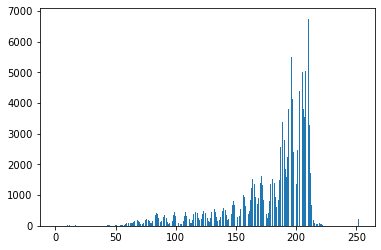